In [7]:
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
clearall()

In [8]:
print('Importing Librairies...')
import talib
import numpy as np
import pandas as pd
import pandas_datareader as web
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
import time
import datetime as dt
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
print('Librairies imported')
print('')

___Author___='LumberJack Jyss'
print('Global Optimized LumberJack Environment Motor 55\nLumberJack Jyss 5779(c)')
print(Fore.BLUE,'°0Oo_D.A.G._26_oO0°')
print('BOOST SKAN 55 Version v1.35',Style.RESET_ALL)



print('')
print('Sraping tickers')
constituents = pd.read_csv('constituents_csv.csv')
print('Scrap -----> ok')
# PARAMETRES TEMPORELS INITIAUX
start = pd.to_datetime('2014-01-06')
end = pd.to_datetime('2018-12-31')


Importing Librairies...
Librairies imported

Global Optimized LumberJack Environment Motor 55
LumberJack Jyss 5779(c)
 °0Oo_D.A.G._26_oO0°
BOOST SKAN 55 Version v1.35 

Sraping tickers
Scrap -----> ok


In [9]:
def scrap_data(ticker,start,end):
    df = web.DataReader(ticker,'yahoo',start,end)
    df = df.drop(['Close'],axis=1)
    df['Close'] = df['Adj Close']
    df = df.drop(['Adj Close'],axis = 1)    
    return(df)

def boost(df):
    print('Boosting')
    X = df.copy()
    X = X.drop(['Close'],axis=1)
    X['Close'] = df['Close']
    y = X.iloc[:,-1]
    Xtrain = X.iloc[:-2,:-1]
    Xtest = X.iloc[-2:-1,:-1]
    yshift = y.shift(-1)
    ytrain = yshift.iloc[:-2]
    ytest = yshift.iloc[-2:-1]

    model = xgb.XGBRegressor(n_estimators=20000, learning_rate=1, gamma=1, subsample=1, colsample_bytree=1, max_depth=100,objective='reg:squarederror')
    
    model.fit( Xtrain, ytrain, early_stopping_rounds=150, eval_set=[(Xtest, ytest)], verbose=0)

    ytrain_pred = model.predict(Xtrain)

    y_pred = model.predict(Xtest)

    pred = model.predict(X.iloc[:,:-1])

    df['Close.S'] = pred
    df['Close.S2'] = df['Close.S']
    df = df.dropna()
    print('Boost ok')
    return(df)
def prepa_data(df):
    tmps1=time.time()
    print('Preparing data...')
    rsi = talib.RSI(df['Close'],timeperiod=14)
    stoc_slowk, stoc_slowd = talib.STOCH(df['High'],df['Low'],df['Close'])
    upper, middle, lower =  talib.BBANDS(df['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
    sma5 = talib.SMA(df['Close'],timeperiod=5)
    sma8 = talib.SMA(df['Close'],timeperiod=8)
    sma10 = talib.SMA(df['Close'],timeperiod=10)
    sma12 = talib.SMA(df['Close'],timeperiod=12)
    sma15 = talib.SMA(df['Close'],timeperiod=15)
    sma30 = talib.SMA(df['Close'],timeperiod=30)
    sma35 = talib.SMA(df['Close'],timeperiod=35)
    sma40 = talib.SMA(df['Close'],timeperiod=40)
    sma45 = talib.SMA(df['Close'],timeperiod=45)
    sma50 = talib.SMA(df['Close'],timeperiod=50)
    atr = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=10)
    delta5_8 = sma5 - sma8
    delta8_10 = sma8 - sma10
    delta10_12 = sma10 - sma12
    delta12_15 = sma12 - sma15
    delta15_30 = sma15 - sma30
    delta30_35 = sma30 - sma35
    delta35_40 = sma35 - sma40
    delta40_45 = sma40 - sma45
    delta45_50 = sma45 - sma50
    bbdelta = upper - middle
    price_bolup = df['Close'] - lower
    price_bolow = df['Close'] - upper
    Ema = talib.EMA(df['Close'],timeperiod=20)
    KC_High = Ema + 2*atr
    KC_Low = Ema - 2*atr
    aroondown, aroonup = talib.AROON(df['High'], df['Low'], timeperiod=9)
    aroon = aroonup - aroondown #(aroonup-aroondown)/abs((aroonup-aroondown))
    rsi30_list = []
    rsi70_list = []
    for i in range(0,df.shape[0]):
        rsi70_list.append(70 - rsi[i])
        rsi30_list.append(rsi[i] - 30)
        #except:
         #   rsi70_list.append(0)
          #  rs30_list.append(0)
    varop_spy = df['Open'] - df['Close']
    varhl_spy = df['High'] - df['Low']
    df['Varop_Spy'] = varop_spy
    df['Varhl_spy'] = varhl_spy
    df['RSI'] = rsi
    df['70 - RSI'] = np.array(rsi70_list)
    df['RSI - 30'] = np.array(rsi30_list)
    df['BBD_Delta_Up'] = bbdelta
    df['delta5_8'] = delta5_8
    df['delta8_10'] = delta8_10
    df['delta10_12'] = delta10_12
    df['delta12_15'] = delta12_15
    df['delta15_30'] = delta15_30
    df['delta30_35'] = delta30_35
    df['delta35_40'] = delta35_40
    df['delta40_45'] = delta40_45
    df['delta45_50'] = delta45_50
    df['Stoc_Slowk'] = stoc_slowk
    df['Stoc_Slowd'] = stoc_slowd
    df['KC_High'] = KC_High
    df['KC_Low'] = KC_Low
    df['upper'] = upper
    df['lower'] = lower
    df['var_bollup_kchigh'] = upper-KC_High
    df['var_bolllow_kclow'] = lower-KC_Low
    df['Aroon Up'] = aroonup
    df['Aroon Down'] = aroondown
    df['Delta Aroon'] = aroon
    up = []
    down = []
    df = df.dropna()
    
    df['%Futur'] = ((df['Close.S']-df['Close']) *100) / (df['Close'])
    df['%Futur2'] = ((df['Close.S2']-df['Close']) *100) / (df['Close'])
    for i in range(0,df.shape[0]):
        if df.iloc[i]['%Futur'] > 0.5 :#or df.iloc[i]['%Futur2'] > 0.1:
            up.append(1)
            down.append(0)
        elif df.iloc[i]['%Futur'] < -0.5: #or df.iloc[i]['%Futur2'] < -0.1:
            up.append(0)
            down.append(1)
        else:
            up.append(0)
            down.append(0)

    df['target_up'] = up  # target_up # abs(np.array(valley))#target_up
    df['target_down'] = down # target_down # abs(np.array(peak))#target_down
    df = df[['High','Low','Open','Volume','Close','Varop_Spy','Varhl_spy','RSI','70 - RSI','RSI - 30','BBD_Delta_Up','delta5_8','delta8_10','delta10_12','delta12_15','delta15_30','delta30_35','delta35_40','delta40_45','delta45_50','Stoc_Slowk','Stoc_Slowd','KC_High','KC_Low','upper','lower','var_bollup_kchigh','var_bolllow_kclow','Aroon Up','Aroon Down','Delta Aroon','Close.S','Close.S2','%Futur','%Futur2','target_up','target_down']]
    #df = df.dropna()
    tmps2=round(time.time()-tmps1,2)
    print ("Data prepared in = %f" %tmps2,'seconds')
    return(df)
def deep_learning(df):
    tmps1=time.time()
    X = df.iloc[:,1:-4]
    y_up = df.iloc[:,-2].values
    y_down = df.iloc[:,-1].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    y_up = np.array(y_up).reshape(-1,1)
    y_down = np.array(y_down).reshape(-1,1)

    Xtrain = X[:bloc1,:]
    Xtest = X[bloc1:,:]
    ytrain_up = y_up[:bloc1,:]
    ytest_up = y_up[bloc1:,:]
    ytrain_down = y_down[:bloc1,:]
    ytest_down = y_down[bloc1:,:]

    seed = 770
    np.random.seed(seed)

    ytrain_up = ytrain_up.reshape(ytrain_up.shape[0],)
    ytrain_down = ytrain_down.reshape(ytrain_down.shape[0],)

    Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1])

    model_up = Sequential()
    # Add an input layer 
    model_up.add(Dense(50, activation='relu'))
    # Add one hidden layer 
    model_up.add(Dense(23, activation='relu'))
    # Add an output layer 
    model_up.add(Dense(1, activation='sigmoid'))

    model_down = Sequential()
    # Add an input layer 
    model_down.add(Dense(50, activation='relu'))
    # Add one hidden layer 
    model_down.add(Dense(23, activation='relu'))
    # Add an output layer 
    model_down.add(Dense(1, activation='sigmoid'))

    print('Processing move_up')
    model_up.compile(loss='binary_crossentropy',
                  optimizer='adam', #rmsprop
                  metrics=['accuracy','mse'])
    
              

    history_up = model_up.fit(Xtrain, ytrain_up,epochs=280, batch_size=8, verbose=0)
    print('\n')
    print('Processing move_down')
    model_down.compile(loss='binary_crossentropy',
                  optimizer='adam', #rmsprop
                  metrics=['accuracy','mse'])

    history_down = model_down.fit(Xtrain, ytrain_down,epochs=280, batch_size=8, verbose=0)
    print('\n')
    print('Computing done')
    print('\n')

    train_acc_up = model_up.evaluate(Xtrain, ytrain_up,verbose=1)
    train_acc_down = model_down.evaluate(Xtrain, ytrain_down,verbose=1)

    yhat_up = model_up.predict_classes(Xtest)
    yhat_down = model_down.predict_classes(Xtest)

    score_up = model_up.evaluate(Xtest, ytest_up,verbose=1)
    score_down = model_down.evaluate(Xtest, ytest_down,verbose=1)

    predict_up = model_up.predict(Xtest)
    predict_down = model_down.predict(Xtest)

    accuracy_up = accuracy_score(ytest_up, yhat_up)
    accuracy_down = accuracy_score(ytest_down, yhat_down)

    # La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents : vrais_positifs/(vrais_positifs+faux_positifs)
    precision_up = precision_score(ytest_up, yhat_up)  
    precision_down = precision_score(ytest_down, yhat_down) 


    # Recall : (vrai_positifs/(vrais_positifs+faux_négatifs))
    recall_up = recall_score(ytest_up, yhat_up) 
    recall_down = recall_score(ytest_down, yhat_down) 


    #roc_up=roc_auc_score(ytest_up,yhat_up)
    #roc_down=roc_auc_score(ytest_down,yhat_down)
    print('\n')
    print(Fore.GREEN,'RESULTATS UP\n',Style.RESET_ALL)
    print('Accuracy: %.2f%%' % (accuracy_up * 100.0))
    print(Fore.BLUE,"Precision: %.2f%% " % (precision_up *100),Style.RESET_ALL,' => Discrimnination des vrais positifs parmi les faux positifs')
    print("Recall: %.2f%% " % (recall_up * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
    #print("ROC: %.2f%% " % (roc_up *100))
    # get probabilities for positive class

    print(classification_report(ytest_up, yhat_up))
    conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
    conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
    conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
    print(confusion_matrix(ytest_up, yhat_up))

    print('\n')
    print('_______________________________________________________________________________________________________________________________________________________________\n')
    print(Fore.RED,'RESULTATS DOWN\n',Style.RESET_ALL)
    print('Accuracy: %.2f%%' % (accuracy_down * 100.0))
    print(Fore.BLUE,"Precision: %.2f%% " % (precision_down *100),Style.RESET_ALL,' => Discrimnination des vrais positifs parmi les faux positifs')
    print("Recall: %.2f%% " % (recall_down * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
    #print("ROC: %.2f%% " % (roc_down *100))
    # get probabilities for positive class

    print(classification_report(ytest_down, yhat_down))
    conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
    conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
    conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
    print(confusion_matrix(ytest_down, yhat_down))
    print('\n')

    resultats = pd.DataFrame()
    resultats['Date'] = df.index[bloc1:]
    resultats.index= df.index[bloc1:]
    resultats['Move Up'] = yhat_up
    resultats['Confiance up'] = (predict_up)*100
    resultats['Move Down'] = yhat_down
    resultats['Confiance Down'] = (predict_down)*100
    resultats['Actual'] = df.iloc[bloc1:]['Close']
    resultats['Actual.S'] = df.iloc[bloc1:]['Close.S']
    open_S = df['Open'].shift(-1)
    resultats['Open.S'] = open_S.iloc[bloc1:]
    dmp_cp=[]
    dmp_cp = ((resultats['Confiance up']-resultats['Confiance Down'])/(resultats['Confiance up']+resultats['Confiance Down'])*100)
    resultats['DMP_CP'] = dmp_cp
    tmps2=round(time.time()-tmps1,2)
    print ("Deep Learning executed in = %f" %tmps2,'seconds')
    #resultats.set_index('Date',inplace=True)
    #parse_dates=resultats['Date']
    return(resultats,precision_up,precision_down,model_up,model_down,scaler)

def learn(df):
    resultats,precision_up,precision_down,model_up,model_down,scaler = deep_learning(df)
    return(resultats,precision_up,precision_down,model_up,model_down,scaler)

def grobeta(df,dfb):
    # create a time-series of monthly data points
    rts = df.resample('M').last()
    rbts = dfb.resample('M').last()
    dfsm = pd.DataFrame({'s_adjclose' : rts['Close'],
                            'b_adjclose' : rbts['Adj Close']},
                            index=rts.index)

    # compute returns
    dfsm[['s_returns','b_returns']] = dfsm[['s_adjclose','b_adjclose']]/\
        dfsm[['s_adjclose','b_adjclose']].shift(1) -1
    dfsm = dfsm.dropna()
    covmat = np.cov(dfsm["s_returns"],dfsm["b_returns"])

    # calculate measures now
    beta = covmat[0,1]/covmat[1,1]
    alpha= np.mean(dfsm["s_returns"])-beta*np.mean(dfsm["b_returns"])

    # r_squared     = 1. - SS_res/SS_tot
    ypred = alpha + beta * dfsm["b_returns"]
    SS_res = np.sum(np.power(ypred-dfsm["s_returns"],2))
    SS_tot = covmat[0,0]*(len(dfsm)-1) # SS_tot is sample_variance*(n-1)
    r_squared = 1. - SS_res/SS_tot
    # 5- year volatiity and 1-year momentum
    volatility = np.sqrt(covmat[0,0])
    momentum = np.prod(1+dfsm["s_returns"].tail(12).values) -1

    # annualize the numbers
    prd = 12. # used monthly returns; 12 periods to annualize
    alpha = alpha*prd
    volatility = volatility*np.sqrt(prd)

    print ('Beta : ',beta,'\n Alpha : ',alpha,'\n R_Squared : ', r_squared, '\n Volatility : ', volatility, '\n Momentum : ',momentum)
    return(beta,alpha,r_squared,volatility,momentum)


In [10]:
ticker = 'MMM'
name = 'smarties'
sector = 'S'
df = pd.DataFrame()
df = scrap_data(ticker,start,end)

In [11]:
df = boost(df)

Boosting
Boost ok


In [12]:
#print(' --- Loop :',loop,' --- ',end='')
print(' --- Symbol : ',Fore.YELLOW,ticker,Style.RESET_ALL,' --- ',end='')
print(' --- Name : ',name,' --- ',end='')
print(' --- Sector : ',sector,' --- ')

error = []
signals = pd.DataFrame(columns = ['Date','Ticker','Open Long','Close Long','Open Short','Close Short','Buy/Sell Price','Quantity','PNL','Cumulative PNL','Latent PNL'])
backtest = pd.DataFrame(columns = ['Symb.','Name','Sector','Period','Begin.','End',\
                          'Pnl $','Pnl %','Gross Profit','Gross Loss','# Winners','# Loosers',\
                          '% Winners','MaxDD $','MaxDD %','Aver. Win $',\
                          'Aver. Loos $','Aver. Duration',\
                          'Total Trades','% Long','% Short','Profit Factor'])

global delta,bloc1,bloc2
tmps1=time.time()
print('Scraping data...')

dfb = web.DataReader('^GSPC','yahoo',start,end)

beta,alpha, r_squared, volatility, momentum = grobeta(df,dfb)

tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'seconds')

print('\n')
print('GOLEM begins Computing...')
print('\n')
delta = round(df.shape[0])
#bloc1 = round(delta*0.80)
bloc1 = 616
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,'\nBloc 2 :',bloc2,' periods ')
print('First period :',df.index[0])
print('Split period :',df.index[bloc1-1])
print('Last period :',df.index[df.shape[0]-1])
print('\n')

print('Data prep')
df = prepa_data(df)
print(Fore.BLUE,'Deeping in blue',Style.RESET_ALL)
print('')
#print(' --- Loop :',loop,' --- ',end='')
print(' --- Symbol : ',Fore.YELLOW,ticker,Style.RESET_ALL,' --- ',end='')
print(' --- Name : ',name,' --- ',end='')
print(' --- Sector : ',sector,' --- ')

resultats,precision_up,precision_down,model_up,model_down,scaler = learn(df)

import sys
orig_stdout = sys.stdout
f = open('backtest de '+str(ticker)+'.txt', 'w')
sys.stdout = f

####################
#### TEST PLOT ####
###################

filtre_up = 93
filtre_down = 97
filtre_up_close = 80
filtre_down_close = 80


plt.figure(figsize=(26,8),dpi=300)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.title('Deep Learning '+name+' Trade Signals')
plt.plot(resultats['Actual'],color='purple',lw=0.9,label=ticker)

green=[]
red=[]
green_close=[]
red_close=[]

for i in range(0,len(resultats)-1):


    if resultats.iloc[i]['Confiance Down'] > filtre_down:
        doob = -1
    elif resultats.iloc[i]['Confiance Down'] > filtre_down_close and resultats.iloc[i]['Confiance Down'] < filtre_down :
        waab = -1
        doob = 0
    elif resultats.iloc[i]['Confiance up'] > filtre_up:
        doob = 1
    elif resultats.iloc[i]['Confiance up'] > filtre_up_close and resultats.iloc[i]['Confiance up'] < filtre_up:
        waab = 1
        doob = 0
    else :
        doob = 0
        waab = 0

    if doob == 1 :#and resultats.iloc[i]['Confiance up'] > filtre_up:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Actual'],c='g',marker='o')
        #doob = -1
        green.append(1)
        red.append(0)
        green_close.append(0)
        red_close.append(1)

    elif doob == -1 :#and resultats.iloc[i]['Confiance Down'] > filtre_down:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Actual'],c='r',marker='o')
        #doob = 1
        green.append(0)
        red.append(1)
        green_close.append(1)
        red_close.append(0)

    elif doob == 0 and waab == -1 :#and resultats.iloc[i]['Confiance Down'] > filtre_down:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Actual'],c='r',marker='o')
        #doob = 1
        green.append(0)
        red.append(0)
        green_close.append(0)
        red_close.append(1)

    elif waab == 1 :#and resultats.iloc[i]['Confiance Down'] > filtre_down:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Actual'],c='r',marker='o')
        #doob = 1
        green.append(0)
        red.append(0)
        green_close.append(1)
        red_close.append(0)  

    else:
        green.append(0)
        red.append(0)
        green_close.append(0)
        red_close.append(0)  

        #doob = 0


plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Actual'],c='g',marker='o',label='Buy Signal')
plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Actual'],c='r',marker='o',label='Sell Signal')
plt.legend()
plt.savefig('backtest de '+str(ticker)+'_01.pdf')
plt.close()


green.append(0)
red.append(0)
green_close.append(0)
red_close.append(0)
resultats['Green'] = green
resultats['Red'] = red
resultats['Green_Close'] = green_close
resultats['Red_Close'] = red_close
#resultats['Actual'] = df['Close'][bloc1:]

########################
####### BACKTEST########
########################
pos_long = 0
pos_short = 0
pactol = 10000/beta
price_buy = 0
price_sell = 0
x = 0
winners = []
loosers = []
nb_win = 0
nb_los = 0
mini_pnl = 0
pos_duration = []
average_duration = resultats.iloc[0,0] - resultats.iloc[0,0]
trades = []
eq_curx = []
eq_cury = []
maxdd = []
nbS = 0
nbL = 0

for i in range(0,len(resultats)-1):
    if pos_long == 0 and pos_short == 0 and resultats.iloc[i]['Green'] == 1 :
        pos_long = 1
        nbL+=1
        x = round((10000/beta)/resultats.iloc[i]['Open.S'])
        price_buy = round(resultats.iloc[i]['Open.S'],2)
        time_enter = resultats.iloc[i]['Date']

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 1,\
                           'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                           'Buy/Sell Price' : price_buy, 'Quantity' : x, 'PNL' : 0,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),\
                                   'Latent PNL':0}],ignore_index=True)

        print('\n Le ',str(resultats.iloc[i]['Date']),', achat de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
        print('Nouveau pactol : ',round(pactol,2))
        trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],1))

    elif pos_long == 1 and resultats.iloc[i]['Green_Close'] == 0 :

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                           'Buy/Sell Price' : price_buy, 'Quantity' : x, 'PNL' : 0,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),\
                                   'Latent PNL':round((resultats.iloc[i]['Open.S'] - price_buy)*x,2)}],ignore_index=True)
        try:
            maxdd.append(round((resultats.iloc[i]['Open.S'] - price_buy)*x,2))
        except:
            print('Null val of maxdd')
            maxdd.append('Null')


    elif pos_long == 1 and resultats.iloc[i]['Green_Close'] == 1 :
        old_pactol = round(pactol,2)
        eq_curx.append(resultats.iloc[i]['Date'])
        eq_cury.append(old_pactol)
        pos_long = 0
        price_sell = round(resultats.iloc[i]['Open.S'],2)
        mini_pnl = round(x*(price_sell-price_buy),2)
        trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],2))

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 1, 'Open Short' : 0, 'Close Short' : 0,\
                           'Buy/Sell Price' : price_sell, 'Quantity' : x, 'PNL' : mini_pnl,\
                                   'Cumulative PNL':round(signals.iloc[:i]['PNL'].sum(),2),'Latent PNL':0}],ignore_index=True)

        pactol = round((pactol + mini_pnl),2)
        print('\n Le ',str(resultats.iloc[i]['Date']),', vente pour close de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
        print('Nouveau pactol : ',pactol)
        print('pnl:', mini_pnl)
        print('prix de vente',price_sell)
        print('prix d achat',price_buy)

        pos_duration.append(resultats.iloc[i]['Date'] - time_enter)

        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1


    elif pos_short == 0 and pos_long == 0 and resultats.iloc[i]['Red']:
        pos_short = 1
        nbS+=1
        x = round((10000/beta)/resultats.iloc[i]['Open.S'])
        price_sell = round(resultats.iloc[i]['Open.S'],2)
        time_enter = resultats.iloc[i]['Date']

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 0, 'Open Short' : 1, 'Close Short' : 0,\
                           'Buy/Sell Price' : price_sell, 'Quantity' : x, 'PNL' : 0,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),'Latent PNL':0}],ignore_index=True)

        print('\n Le ',str(resultats.iloc[i]['Date']),', vente de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
        print('Nouveau pactol : ',pactol)
        trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],-1))


    elif pos_short == 1 and resultats.iloc[i]['Red_Close'] == 0 :

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                           'Buy/Sell Price' : price_sell, 'Quantity' : x, 'PNL' : 0,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),\
                                   'Latent PNL':-round((resultats.iloc[i]['Open.S'] - price_sell)*x,2)}],ignore_index=True)
        try:
            maxdd.append(round((resultats.iloc[i]['Open.S'] - price_sell)*x,2))
        except:
            print('Null val of maxdd')
            maxdd.append(0)

    elif pos_short == 1 and resultats.iloc[i]['Red_Close'] == 1 :
        old_pactol = round(pactol,2)
        eq_curx.append(resultats.iloc[i]['Date'])
        eq_cury.append(old_pactol)
        pos_short = 0
        price_buy = round(resultats.iloc[i]['Open.S'],2)
        trades.append((round(resultats.iloc[i]['Open.S'],2),resultats.iloc[i]['Date'],-2))
        mini_pnl = round(x*(price_sell-price_buy),2)

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 1,\
                           'Buy/Sell Price' : price_buy, 'Quantity' : x, 'PNL' : mini_pnl,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),'Latent PNL':0}],ignore_index=True)

        pactol = round((pactol + mini_pnl),2)
        print('\n Le ',str(resultats.iloc[i]['Date']),', achat pour close de ',x,' actions à',round(resultats.iloc[i]['Open.S'],2),'$')
        print('Nouveau pactol : ',pactol)

        print('prix de vente',price_sell)
        print('prix d achat',price_buy)

        print('pnl:', mini_pnl)
        pos_duration.append(resultats.iloc[i]['Date'] - time_enter)
        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1
    else:

        signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                       'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 0,\
                       'Buy/Sell Price' : 0, 'Quantity' : 0, 'PNL' : 0,\
                                   'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),'Latent PNL':0}],ignore_index=True)

if pos_long == 1:
    pos_long = 0
    print('Cutting non resolved position')
    print(' Le price buy était de : ',price_buy)
    x = round((10000/beta)/resultats.iloc[i]['Open.S'])
    print('x = ',x)
    price_sell = round(resultats.iloc[i]['Open.S'],2)
    print('Et le price sell : ',price_sell)
    mini_pnl = round(x*(price_sell-price_buy),2)

    signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 1, 'Open Short' : 0, 'Close Short' : 0,\
                           'Buy/Sell Price' : price_sell, 'Quantity' : x, 'PNL' : mini_pnl,\
                               'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),'Latent PNL':0}],ignore_index=True)

    pactol = round((pactol + mini_pnl),2)
    print('pnl : ',mini_pnl)
    if mini_pnl > 0:
        winners.append(mini_pnl)
        mini_pnl = 0
        nb_win +=1
    else :
        loosers.append(mini_pnl)
        mini_pnl = 0
        nb_los +=1


if pos_short == 1:
    pos_short = 0
    print('Cutting non resolved position')
    print(' Le price sell était de : ',price_sell)
    x = round((10000/beta)/resultats.iloc[i]['Open.S'])
    print('x = ',x)
    price_buy = round(resultats.iloc[i]['Open.S'],2)
    print('Et le price_buy : ',price_buy)
    mini_pnl = round(x*(price_sell-price_buy),2)

    signals = signals.append([{ 'Date': resultats.iloc[i]['Date'], 'Ticker' : ticker, 'Open Long' : 0,\
                           'Close Long' : 0, 'Open Short' : 0, 'Close Short' : 1,\
                           'Buy/Sell Price' : price_buy, 'Quantity' : x, 'PNL' : mini_pnl,\
                               'Cumulative PNL':signals.iloc[:i]['PNL'].sum(),'Latent PNL':0}],ignore_index=True)

    pactol = round((pactol + mini_pnl),2)
    print('pnl : ',mini_pnl)

    if mini_pnl > 0:
        winners.append(mini_pnl)
        mini_pnl = 0
        nb_win +=1
    else :
        loosers.append(mini_pnl)
        mini_pnl = 0
        nb_los +=1


pnl = round(pactol - (10000/beta),2)
print('\n Begining of BackTest :',resultats.iloc[0]['Date'])
print('Instrument :',ticker)
print('Face value per trade : $',10000/beta)
print('End of BackTest :',resultats.iloc[-1]['Date'])
duration = pd.to_timedelta((resultats.iloc[-1]['Date'] - resultats.iloc[0]['Date']),unit='d')
print("BackTest's period :",duration)
print('Pnl :',round(pnl,2),'$')
print('% Pnl : ',round(pnl/(10000/beta)*100,2))
print('Total winners :',round(sum(winners),2),'$')
print('Total loosers :',round(sum(loosers),2),'$')
print('Number of winners :',round(nb_win))
print('Number of loosers :',round(nb_los))
print('Maximum Drawdown : ',round(min(maxdd),2))
print('% Max Drawdown : ',round(min(maxdd)/(10000/beta)*100,2),'%')
print('Nombre toatl de trades : ',round(nbL+nbS,2))
print('% de trades Long : ',round((nbL*100)/(nbL+nbS),2))
print('% de trades Short : ',round((nbS*100)/(nbL+nbS),2))
try:
    print('% winners :', round((nb_win/(nb_win+nb_los) * 100),2),'%')
    print('Average winners :',(round(sum(winners)/(nb_win))))
except:
    print('% winners : null')
try:
    print('Average losers :',(round(sum(loosers)/(nb_los))))
except:
    print('Average losers : Inf')
try:
    for t in range(0,len(pos_duration)):
        average_duration = pd.to_timedelta((average_duration + pos_duration[t]),unit='d')
    average_duration = average_duration/(nb_los+nb_win)
    print('Average Duration :', average_duration)
except:
    print('No Average Duration available')
try:
    print('Profit Factor : ',abs(round((sum(winners)/sum(loosers)),2)))
except:
    print('Profit Factor : null')

########################
##### PLOT TRADES ######
########################

plt.figure(figsize=(26,8),dpi=300)
plt.title('Deep Learning '+ticker+' Trades')
plt.plot(resultats['Open.S'],color='blue',lw=0.9)
for i in range(0,len(trades)):
    if trades[i][2] == 1:
        plt.scatter(x=trades[i][1],y=trades[i][0],c='green',marker='^',lw=2.5)
    elif trades[i][2] == -1:
        plt.scatter(x=trades[i][1],y=trades[i][0],c='red',marker='^',lw=2.5)
    elif trades[i][2] == 2:
        plt.scatter(x=trades[i][1],y=trades[i][0],c='g',marker='x',lw=2.5)
    elif trades[i][2] == -2:
        plt.scatter(x=trades[i][1],y=trades[i][0],c='r',marker='x',lw=2.5)

plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Open.S'],c='g',marker='^',label='Open Long')
plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Open.S'],c='r',marker='^',label='Open Short')
plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Open.S'],c='g',marker='x',label='Close Long')
plt.scatter(x=resultats.index[i],y=resultats.iloc[i]['Open.S'],c='r',marker='x',label='Close Short')
plt.legend()
plt.savefig('backtest de '+str(ticker)+'_02.pdf')
plt.close()

#########################
##### PLOT E-CURVE ######
#########################
plt.figure(figsize=(26,8),dpi=300)
plt.title('Deep Learning '+ticker+' Equity Curve')
plt.plot(eq_curx,eq_cury)
plt.scatter(x=eq_curx,y=eq_cury,c='orange',marker='o',lw=2.5)
plt.savefig('backtest de '+str(ticker)+'_03.pdf')
plt.close()


f.close()
sys.stdout = orig_stdout

#print('\r Boucle ', loop, 'terminée...',end='')
#print('Opération restantes :', len(constituents)-loop,'/',len(constituents),'\n')


backtest = backtest.append([{'Symb.':ticker,'Name':name,'Sector':sector,'Period':duration,'Begin.':resultats.iloc[0,0],'End':resultats.iloc[-1,0],\
                  'Pnl $':pnl,'Pnl %':round(pnl/(10000/beta)*100,2),'Gross Profit':round(sum(winners),2),'Gross Loss':round(sum(loosers),2),'# Winners':nb_win,'# Loosers':nb_los,\
                  '% Winners':round((nb_win/(nb_win+nb_los) * 100),2),'MaxDD $':round(min(maxdd),2),'MaxDD %':round(min(maxdd)/(10000/beta)*100,2),'Aver. Win $':(round(sum(winners)/(nb_win))),\
                  'Aver. Loos $':(round(sum(loosers)/(nb_los))),'Aver. Duration':average_duration,\
                  'Total Trades':nbL+nbS,'% Long':round((nbL*100)/(nbL+nbS),2),'% Short':round((nbS*100)/(nbL+nbS),2), 'Profit Factor':abs(round((sum(winners)/sum(loosers)),2))}], ignore_index=True)


#signals = signals.append([{ 'Date': list_signals[0], 'Ticker' : list_signals[8], 'Open Long' : list_signals[1],\
                           #'Close Long' : list_signals[2], 'Open Short' : list_signals[3], 'Close Short' : list_signals[4],\
                           #'Buy/Sell Price' : list_signals[5], 'Quantity' : list_signals[6], ' tPNL' : list_signals[7]}])

#signals['Date'] = list_signals[0]
#signals['Ticker'] = list_signals[8]
#signals['Open Long'] = list_signals[1]
#signals['Close Long'] = list_signals[2]
#signals['Open Short'] = list_signals[3]
#signals['Close Short'] = list_signals[4]
#signals['Buy/Sell Price'] = list_signals[5]
#signals['Quantity'] = list_signals[6]
#signals['tPNL'] = list_signals[7]

# symbol / name / sector / period of backtest / debut / fin / pnl / total winners / total loosers / Nb winners / nb loosers / 
# / % winners / Max DD / Aver Win / Aver Loos / Average duration / Profit Factor
print(Fore.YELLOW,'Writing BACKTEST CSV AND SIGNALS.CSV',Style.RESET_ALL)
backtest.to_csv('BackTest.csv')
signals.sort_values(by=['Date'])
signals.to_csv('SIGNALS.csv')

print(Fore.CYAN,'BACKTEST CSV WRITED AND SIGNALS.CSV',Style.RESET_ALL)

 --- Symbol :   MMM   ---  --- Name :  smarties  ---  --- Sector :  S  --- 
Scraping data...
Beta :  1.10103398185407 
 Alpha :  0.03740900763505639 
 R_Squared :  0.5104087544382196 
 Volatility :  0.1668615028057969 
 Momentum :  -0.16899134279420125
executed in = 0.600000 seconds


GOLEM begins Computing...


# of periods :  1256
On 80% - 20% slash : 
Bloc 1 :  616 
Bloc 2 : 640  periods 
First period : 2014-01-06 00:00:00
Split period : 2016-06-15 00:00:00
Last period : 2018-12-31 00:00:00


Data prep
Preparing data...
Data prepared in = 0.690000 seconds
 Deeping in blue 

 --- Symbol :   MMM   ---  --- Name :  smarties  ---  --- Sector :  S  --- 
Processing move_up


Processing move_down


Computing done


204/204 [==============================] - 0s 32us/step


 RESULTATS UP
 
Accuracy: 70.59%
 Precision: 59.26%    => Discrimnination des vrais positifs parmi les faux positifs
Recall: 24.62%   => Positifs trouvés par Golem sur tous les positifs existants
              precision  

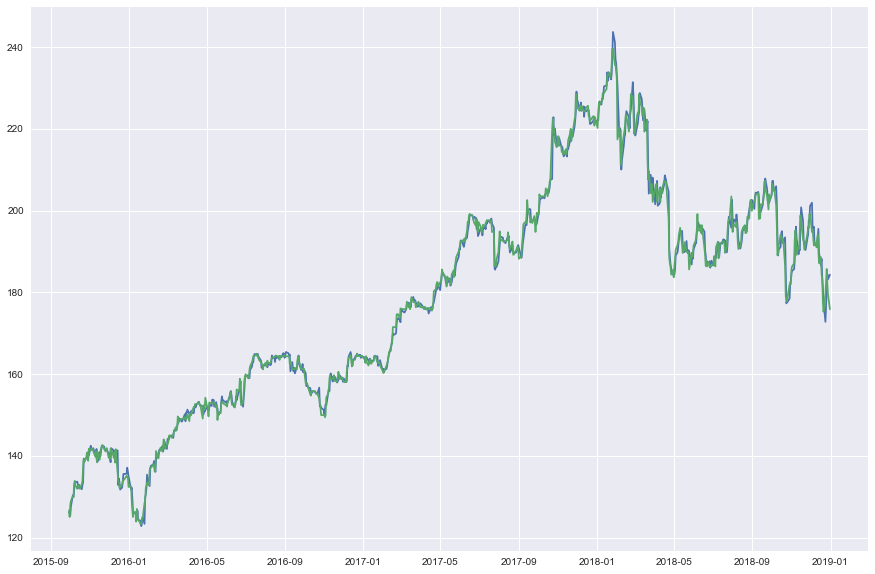

In [13]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'])
plt.plot(df['Close.S'])

In [14]:
#percent = (df['Close'].shift(1)-df['Close.S'])/df['Close'].shift(1)*100
percent = (df['Close']-df['Close.S'].shift(1))/df['Close']*100

In [15]:
percent.mean()

0.06096669700972825

In [16]:
percent.max()

2.6329199847684643

In [17]:
percent.min()

-4.784987009068329

In [18]:
percent

Date
2015-09-29         NaN
2015-09-30   -0.272857
2015-10-01    0.317975
2015-10-02   -0.337099
2015-10-05    1.026857
                ...   
2018-12-24   -1.426177
2018-12-26    0.361077
2018-12-27   -0.676896
2018-12-28    0.689129
2018-12-31    2.632920
Length: 820, dtype: float64

In [ ]:
df.to_csv('A_BasePrep.csv')

In [ ]:
df